In [1]:
import os
import numpy as np
import math
from math import sqrt
from random import randrange
import matplotlib.pyplot as plt

In [2]:
# get all file name from directory

train_path= 'C:\\Users\\vrajp\\Downloads\\COMP-5013-dataset1\\training_validation'

train_res = os.listdir(train_path)

In [3]:
def get_dataset(path,res):
    final_list=[]
    class_label=[]
    for k in range(len(res)):
        main_list=[]
        with open(path+'\\'+res[k]) as f:
            nums_list=[]
            data_set=[]
            for i in f.readlines():
                for j in i:
                    if j=='0':
                        nums_list.append(0)
                    if j=='1':
                        nums_list.append(1)
            main_list.append(int(res[k][6]))
            main_list.append(np.array(nums_list))
        final_list.append(main_list)
    return final_list

In [4]:
def cross_validation(dataset,num_folds):
    length_dataset=len(dataset)
    folded_data=list()
    folds=int(length_dataset/num_folds)
    for i in range(num_folds):
        if i==(num_folds-1):
            start=i*folds
            end=len(dataset)
            folded_data.append(list(dataset[start:end]))
        else:
            start=i*folds
            end=(i+1)*folds
            folded_data.append(list(dataset[start:end]))
    return folded_data
    
        

In [5]:
def calculate_accuracy(data):
    corrected=0
    for i in range(len(data)):
        if(data[i][0]==data[i][1]):
            corrected+=1
    return float(corrected/len(data))*100       

In [6]:
def do_prediction(train_data,test_data,k):
    result=list()
    for i in range(len(test_data)):
            distance=list()
            temp={}
            for j in range(len(train_data)):
                distance.append([test_data[i][0],train_data[j][0],float(sqrt(np.sum(np.square(np.array(test_data[i][1])-np.array(train_data[j][1])))))])
            distance.sort(key = lambda x: x[2])
            for p in range(k):
                if distance[p][1] in temp.keys():
                    temp.update({distance[p][1]:temp[distance[p][1]]+1})
                else:
                    temp[distance[p][1]]=1
            predicted_value=max(temp, key=lambda x: temp[x])
            temp=[predicted_value,test_data[i][0]]
            result.append(temp)
    return result

In [7]:
def predict_digit(folded_data,k,folds):
    
    scores=[]
    for z in range(folds):
        train_data=list()
        test_data=list()
        for m in range(folds):
            if z==m:
                test_data+=folded_data[m]
            else:
                train_data+=folded_data[m]
        result=do_prediction(train_data,test_data,k)
        accuracy=calculate_accuracy(result)
        scores.append(accuracy)
        average_accuracy=float(sum(scores)/len(scores))
    return average_accuracy

In [8]:
def KNN_Algorithm(dataset,K,folds):
    folded_data=cross_validation(list(dataset),folds)
    acc=predict_digit(folded_data,K,folds)
    return acc

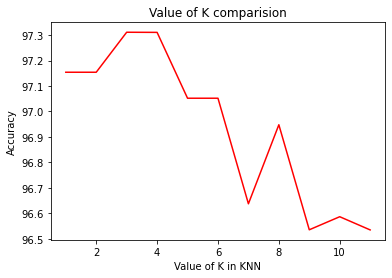

CPU times: total: 6min 5s
Wall time: 8min 13s


In [9]:
%%time
dataset=get_dataset(train_path,train_res)
dataset=np.array(dataset,dtype=object)
np.random.shuffle(dataset)
folds=5
All_accuracy=dict()
for i in range(11):
    accuracy=KNN_Algorithm(dataset,i+1,folds)
    All_accuracy[i+1]=accuracy
    

plt.plot(All_accuracy.keys(),All_accuracy.values(),color='r')

plt.xlabel("Value of K in KNN")
plt.ylabel("Accuracy")
plt.title("Value of K comparision")
plt.show()

Keymax = max(zip(All_accuracy.values(), All_accuracy.keys()))[1]


In [10]:
test_path= "C:\\Users\\vrajp\\Downloads\\COMP-5013-dataset1\\test"

test_res=os.listdir(test_path)

train_data=np.array(get_dataset(train_path,train_res),dtype=object)
test_data=np.array(get_dataset(test_path,test_res),dtype=object)

result=do_prediction(train_data,test_data,Keymax)

accuracy=calculate_accuracy(result)

print(accuracy)

98.5200845665962
